# Preprocessing

In [1]:
import warnings, platform
import matplotlib.pyplot as plt

from IPython.display import display, HTML

In [2]:
### HTML display 조정
display(HTML("<style>.container {width :98% !important;}</style>"))

### Warning 제거
warnings.filterwarnings('ignore')

In [3]:
### 한글 폰트 설정
if platform.system()=='Darwin':
    plt.rc('font', family='AppleGothic')
elif platform.system()=='Linux':
    # !wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
    # !mv malgun.ttf /usr/share/fonts/truetype/
    import matplotlib.font_manager as fm
    fm._rebuild()
    plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False # minus 폰트 깨짐 해결

## Package load

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns

In [5]:
from sklearn.datasets import load_wine
from sklearn.datasets import load_iris
from sklearn.datasets import fetch_openml

from sklearn.datasets import make_classification
from sklearn.datasets import make_swiss_roll

## Measure Elapsed Time

In [6]:
import time
import datetime
from timeit import timeit

In [7]:
timeit("time.sleep(1)", number=2, globals=globals())

2.0060435839986894

In [8]:
start = time.time() # 시작
time.sleep(1) # 수행시간 측정하고자 하는 코드 부분
sec = time.time() - start # 종료 - 시작 (걸린 시간)
 
times = str(datetime.timedelta(seconds=sec)) # 걸린 시간 보기좋게 바꾸기
short = times.split(".")[0] # 초 단위 까지만
print(f"{times} sec")
print(f"{short} sec")

0:00:01.003015 sec
0:00:01 sec


In [9]:
%%time
time.sleep(1)

CPU times: user 1.58 ms, sys: 1.13 ms, total: 2.71 ms
Wall time: 1 s


In [10]:
%%timeit
time.sleep(1)

1 s ± 1.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Data load

In [11]:
wine_load = load_wine()
wine = pd.DataFrame(wine_load.data, columns=wine_load.feature_names)
wine['Class'] = wine_load.target
wine['Class'] = wine['Class'].map({0: 'class_0', 1: 'class_1', 2: 'class_2'})

iris = load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris['Class'] = load_iris().target
iris['Class'] = iris['Class'].map({0: 'Setosa', 1: 'Versicolour', 2: 'Virginica'})

titanic_df = pd.read_csv('./pymlrev2-main/1장/titanic_train.csv')
housing = pd.read_csv('./handson-ml2/datasets/housing/housing.csv')
diabetes = pd.read_csv('./data/diabetes.csv')
arima_data = pd.read_csv('./ADP_book_ver01/data/arima_data.csv', names=['day', 'price'])
birth_data = pd.read_csv( "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-total-female-births.csv")
ldeaths = pd.read_csv('./r_csv/datasets/ldeaths.csv').drop('Unnamed: 0', axis=1)
usarrests = pd.read_csv('./r_csv/datasets/USArrests.csv', index_col='Unnamed: 0')
eurodist = pd.read_csv('./r_csv/datasets/eurodist.csv', index_col='city')
bfi = pd.read_csv("./data/bfi.csv", index_col="Unnamed: 0")
stretch = pd.read_csv('./data/adult_stretch.csv')

# !pip install xlrd
# header로 의미 없는 첫 행 제거, iloc로 기존 id 제거
card = pd.read_excel('./data/pca_credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]

loan3000 = pd.read_csv("./Practical_Statictics/data/loan3000.csv")
loan3000.outcome = loan3000.outcome.astype('category')

def parser(x):
    return datetime.datetime.strptime('190' + x, '%Y-%m')

shampoo = pd.read_csv('./data/shampoo.csv', header=0, parse_dates=[0], index_col=0, date_parser=parser)

mercari_df = pd.read_csv('./data/mercari_train.tsv', sep='\t')
y_train_df = mercari_df['price']

students = pd.DataFrame({'이름':['장화', '홍련', '콩쥐', '팥쥐', '해님', '달님'], 
                         '국어': [70, 85, None, 100, None, 85], 
                         '수학':[65, 100, 80, 95, None, 70]})

health = pd.DataFrame({'연도': [2017, 2018, 2019, 2020, 2021, 2022], 
                       '키': [160, 162, 165, None, None, 166],
                       '몸무게': [53, 52, None, 50, 51, 54],
                       '시력': [1.2, None, 1.2, 1.2, 1.1, 0.8],
                       '병결': [None, None, None, 2, None, 1]})

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']
item_df = pd.DataFrame({'item': ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']})

## Missing Value

### (1) Find NA

#### Is/Not NA

In [12]:
titanic_df.isna().head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False


In [13]:
students.isna()

,이름,국어,수학
0,False,False,False
1,False,False,False
2,False,True,False
3,False,False,False
4,False,True,True
5,False,False,False


In [14]:
students.notna()

,이름,국어,수학
0,True,True,True
1,True,True,True
2,True,False,True
3,True,True,True
4,True,False,False
5,True,True,True


#### NA Count

In [15]:
### column 별 NA 개수
students.isna().sum()

이름    0
국어    2
수학    1
dtype: int64

In [16]:
### row 별 NA 개수
students.isna().sum(1)

0    0
1    0
2    1
3    0
4    2
5    0
dtype: int64

In [17]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

#### Missing Graph

In [19]:
import missingno as msno

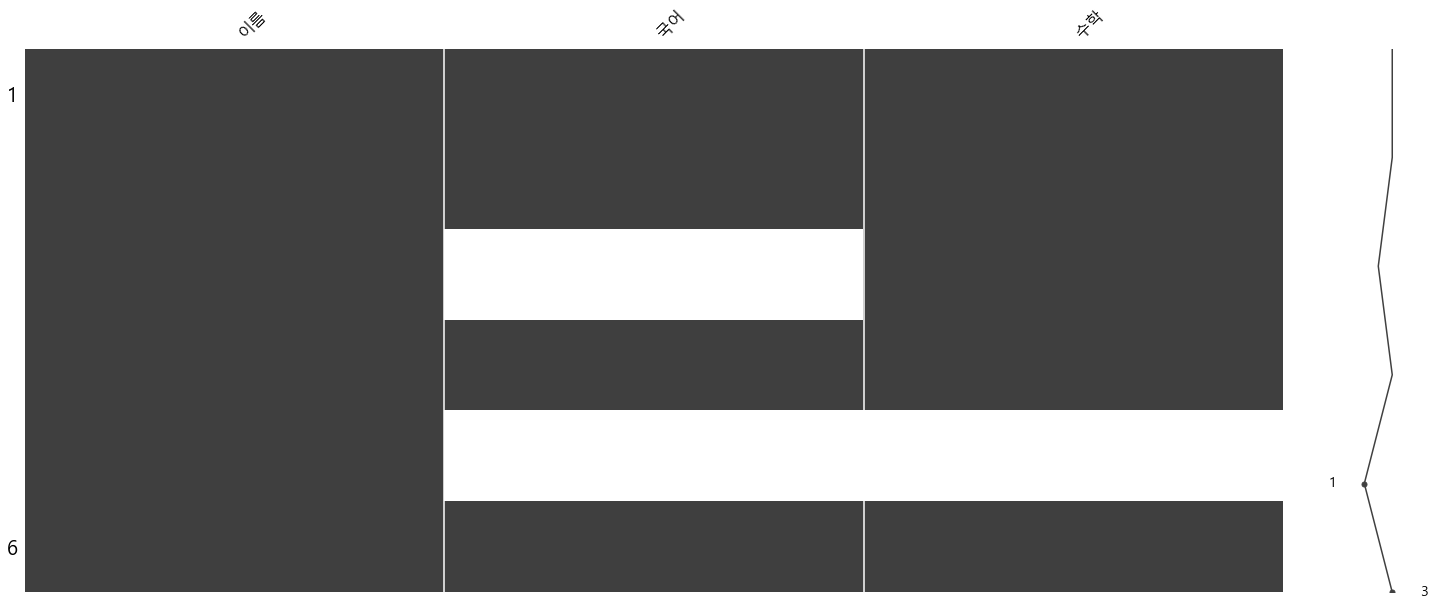

In [20]:
### Missingmap
# 큰 데이터의 missing 확인에 유용
msno.matrix(students)
plt.show()

### (2) Drop NA

In [21]:
students.dropna() # 결측 행 삭제, axis 변수 또는 'index'/'columns'으로 행/열 조정 가능

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [22]:
students.dropna(thresh=2) # 결측값 아닌 개수 지정

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [23]:
students.dropna(subset=['수학']) # subset에 NA가 있는 경우 제거

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [24]:
students.dropna(how='all', subset=['국어', '수학']) # 국어, 수학이 모두 NA이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,NaN,80.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


In [25]:
students.dropna(how='any') # 한 컬럼 이상이면 삭제

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
3,팥쥐,100.0,95.0
5,달님,85.0,70.0


### (3) NA Impute

#### Fill NA

In [26]:
students.fillna(value=0)

,이름,국어,수학
0,장화,70.0,65.0
1,홍련,85.0,100.0
2,콩쥐,0.0,80.0
3,팥쥐,100.0,95.0
4,해님,0.0,0.0
5,달님,85.0,70.0


In [27]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [28]:
health # original table

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,NaN
1,2018,162.0,52.0,NaN,NaN
2,2019,165.0,NaN,1.2,NaN
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,NaN
5,2022,166.0,54.0,0.8,1.0


In [29]:
health.fillna(0)

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,0.0,0.0
2,2019,165.0,0.0,1.2,0.0
3,2020,0.0,50.0,1.2,2.0
4,2021,0.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [30]:
health.fillna(health.mean()) # 평균으로 채우기

,연도,키,몸무게,시력,병결
0,2017,160.00,53.0,1.2,1.5
1,2018,162.00,52.0,1.1,1.5
2,2019,165.00,52.0,1.2,1.5
3,2020,163.25,50.0,1.2,2.0
4,2021,163.25,51.0,1.1,1.5
5,2022,166.00,54.0,0.8,1.0


In [31]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [32]:
### column별 NA 채우기
health['병결'] = health['병결'].fillna(0)
health['몸무게'] = health['몸무게'].fillna(health['몸무게'].mean())
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,NaN,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,NaN,50.0,1.2,2.0
4,2021,NaN,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [33]:
### pad/ffill, backfill/bfill
health.fillna(method='pad', inplace=True) # 직전 값으로 대체. ffill 옵션도 동일한 결과. 그리고 원본 데이터를 반영 (inplace)
health

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


#### Imputer
- SimpleImputer
- KNNImputer: KNN모델을 사용한 Imputer

In [34]:
### 새로운 feature 만들기 (is_na 등)
np.where(health['키'].isna(), 1, 0)

array([0, 0, 0, 0, 0, 0])

In [35]:
from sklearn.impute import SimpleImputer

In [36]:
### Imputer: 모든 수치형 변수에 적용
imputer = SimpleImputer(strategy="median")

In [37]:
housing_num = housing.drop("ocean_proximity", axis=1) # 수치 변수만 추출
imputer.fit(housing_num) 
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [38]:
housing_num.median().values # imputer가 저장하고 있는 것과 동일

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [39]:
x = imputer.transform(housing_num)
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

In [40]:
from sklearn.impute import KNNImputer

In [41]:
### KNN Imputation
# 수치형 변수에만 사용 가능
imputer = KNNImputer()

In [42]:
x = imputer.fit_transform(housing_num) # fit and transform
housing_tr = pd.DataFrame(x, columns=housing_num.columns, index=housing_num.index)

#### Impute with Model
- Regression imputation: 변수의 분산을 줄인다는 단점이 있음
- Single stochastic imputation

In [43]:
### diabates data
# 0이 되면 안되는 변수들 선택
diabetes.loc[diabetes["Glucose"]==0.0, "Glucose"] = np.NAN
diabetes.loc[diabetes["BloodPressure"]==0.0, "BloodPressure"] = np.NAN
diabetes.loc[diabetes["SkinThickness"]==0.0, "SkinThickness"] = np.NAN
diabetes.loc[diabetes["Insulin"]==0.0, "Insulin"] = np.NAN
diabetes.loc[diabetes["BMI"]==0.0, "BMI"] = np.NAN

diabetes.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [44]:
missing_columns = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]

In [45]:
for feature in missing_columns:
    diabetes[feature + '_imp'] = diabetes[feature]

    number_missing = diabetes[feature].isnull().sum()
    observed_values = diabetes.loc[diabetes[feature].notnull(), feature]
    diabetes.loc[diabetes[feature].isnull(), feature + '_imp'] = np.random.choice(observed_values, number_missing, replace=True)

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
### Regression imputation
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])

for feature in missing_columns:
    deter_data["Det" + feature] = diabetes[feature + "_imp"]
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[diabetes[feature].isnull(), "Det" + feature] = model.predict(diabetes[parameters])[diabetes[feature].isnull()]

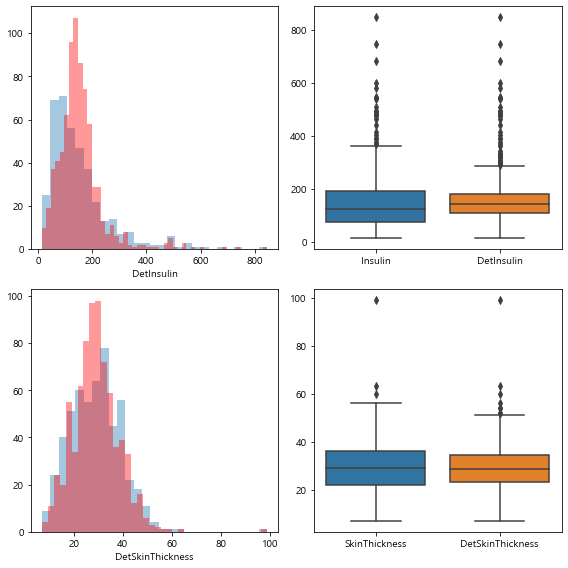

In [48]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(deter_data["Det" + variable], kde=False, ax=axes[index, 0], color='red') 
    sns.boxplot(data = pd.concat([diabetes[variable], deter_data["Det" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

In [49]:
### Single Stochastic Imputation
random_data = pd.DataFrame(columns=["Ran" + name for name in missing_columns])

for feature in missing_columns:
    random_data["Ran" + feature] = diabetes[feature + '_imp']
    parameters = list(set(diabetes.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = LinearRegression()
    model.fit(diabetes[parameters], diabetes[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(diabetes[parameters])
    std_error = (predict[diabetes[feature].notnull()] - diabetes.loc[diabetes[feature].notnull(), feature + '_imp']).std()
    
    # observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size=diabetes[feature].shape[0], loc = predict, scale = std_error)
    random_data.loc[(diabetes[feature].isnull()) & (random_predict > 0),
                    "Ran" + feature] = random_predict[(diabetes[feature].isnull()) & (random_predict > 0)]

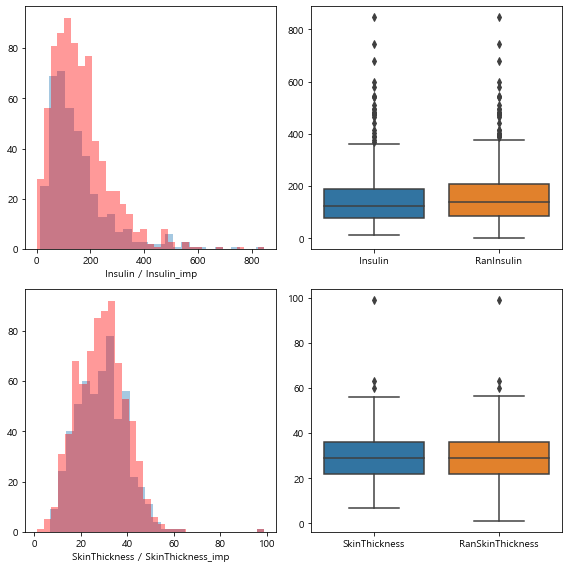

In [50]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(8, 8)

for index, variable in enumerate(["Insulin", "SkinThickness"]):
    sns.distplot(diabetes[variable].dropna(), kde=False, ax=axes[index, 0])
    sns.distplot(random_data["Ran" + variable], kde=False, ax=axes[index, 0], color='red')
    axes[index, 0].set(xlabel = variable + " / " + variable + '_imp')
    sns.boxplot(data = pd.concat([diabetes[variable], random_data["Ran" + variable]], axis=1), ax=axes[index, 1])
    
plt.tight_layout()

## Duplicates

### (1) Drop Duplicates

In [51]:
health['키'].drop_duplicates().tolist()

[160.0, 162.0, 165.0, 166.0]

In [52]:
set(health['키'])

{160.0, 162.0, 165.0, 166.0}

In [53]:
health[['시력','병결']].drop_duplicates() # 모든 컬럼이 같은 경우에만 제거

,시력,병결
0,1.2,0.0
3,1.2,2.0
4,1.1,0.0
5,0.8,1.0


In [54]:
health.drop_duplicates(subset=['시력']) # 특정 컬럼 기준 drop

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


### (2) Find Duplicates

In [55]:
health # original table

,연도,키,몸무게,시력,병결
0,2017,160.0,53.0,1.2,0.0
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
3,2020,165.0,50.0,1.2,2.0
4,2021,165.0,51.0,1.1,0.0
5,2022,166.0,54.0,0.8,1.0


In [56]:
# find
health[health.duplicated(subset=['시력', '병결'], keep='first')]

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0


In [57]:
# find all duplicates (include first)
pd.concat([health[health.duplicated(subset=['시력', '병결'], keep='first')], 
           health[health.duplicated(subset=['시력', '병결'], keep='last')]]).drop_duplicates()

,연도,키,몸무게,시력,병결
1,2018,162.0,52.0,1.2,0.0
2,2019,165.0,52.0,1.2,0.0
0,2017,160.0,53.0,1.2,0.0


## Outlier

### (1) Outlier detect

#### Boxplot and IQR

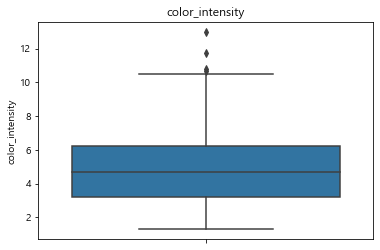

In [58]:
sns.boxplot(y=wine['color_intensity'], whis=1.5)
plt.title('color_intensity')
plt.show()

In [59]:
### Outlier detect function
def outliers_iqr(df, column):
    quartile_1, quartile_3 = np.percentile(df[column], [25, 75])
    iqr = quartile_3 - quartile_1
    lower_whis = quartile_1 - (iqr * 1.5)
    upper_whis = quartile_3 + (iqr * 1.5)
    
    outliers = df[(df[column] > upper_whis) | (df[column] < lower_whis)]
    
    return outliers[[column]]

In [60]:
outliers = outliers_iqr(df=wine, column='color_intensity')
outliers

,color_intensity
151,10.80
158,13.00
159,11.75
166,10.68


#### DBSCAN 
- -1로 클러스터링 된 데이터를 outlier로 함
- DBSCAN 부분 참고

### (2) Outlier cleansing

#### Trimming
- Outlier 삭제

In [61]:
drop_outliers = wine.drop(index=outliers.index)

print('Original :', wine.shape)
print('Drop outliers :', drop_outliers.shape)

Original : (178, 14)
Drop outliers : (174, 14)


In [62]:
wine.loc[outliers.index, 'color_intensity'] = np.NaN # Outlier를 NA로 만든 다음, 대체
wine['color_intensity'] = wine['color_intensity'].fillna(wine['color_intensity'].mean()) # 평균 치환
wine.loc[outliers.index, 'color_intensity']

151    4.908678
158    4.908678
159    4.908678
166    4.908678
Name: color_intensity, dtype: float64

#### Winsorizing, Clipping
- 상/하한을 정하고, 넘는 값을 상/하한으로 조정

In [63]:
from scipy.stats.mstats import winsorize

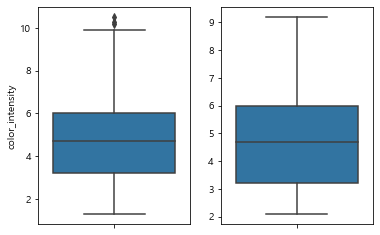

In [64]:
winsorized = winsorize(wine['color_intensity'], (0.05, 0.05))

fig, axes = plt.subplots(nrows=1, ncols=2)
sns.boxplot(y=wine['color_intensity'], ax=axes[0])
sns.boxplot(y=winsorized, ax=axes[1])
plt.show()

## Categorical data
- 범주형 변수의 수학적 연산이 가능하게끔 함: Dummy 변수 생성
- Label(Ordinal) encoding, One-hot encoding
- LabelBinarizer는 sparse matrix의 One-hot encoding에 사용

In [65]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

### (1) LabelEncoder, OrdinalEncoder
- cat -> num
- target을 숫자로 변환하는 데 용이하며, ML 모델에 사용하기에는 적합하지 않음

In [66]:
### LabelEncoder
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

인코딩 변환값: [0 1 4 5 3 3 2 2]


In [67]:
print('인코딩 클래스:', encoder.classes_)
print('디코딩 원본 값:', encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

인코딩 클래스: ['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']
디코딩 원본 값: ['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


In [68]:
### OrdinalEncoder
encoder = OrdinalEncoder()
housing_cat = housing[["ocean_proximity"]]
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [3.],
       [3.],
       ...,
       [1.],
       [1.],
       [1.]])

### (2) LabelBinarizer
- Sparse One-hot encoding

In [69]:
lb = LabelBinarizer(sparse_output=True)
lb.fit([1, 2, 6, 4, 2])

LabelBinarizer(sparse_output=True)

In [70]:
lb.classes_

array([1, 2, 4, 6])

In [71]:
lb.transform([1, 6]).toarray()

array([[1, 0, 0, 0],
       [0, 0, 0, 1]])

In [72]:
lb.fit(np.array([[0, 1, 1], [1, 0, 0]]))
lb.classes_

array([0, 1, 2])

In [73]:
lb.transform([0, 1, 2, 1]).toarray()

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1],
       [0, 1, 0]])

### (3) One-hot encoder

#### OneHotEncoder()

In [74]:
encoder = OneHotEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [75]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [76]:
housing_cat_encoded.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [77]:
# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)

원-핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]
원-핫 인코딩 데이터 차원
(8, 6)


#### get_dummies()

In [78]:
dummy_col = pd.get_dummies(item_df)
dummy_col

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


In [79]:
# 생성된 dummy의 T/F를 1/0으로 변경
for col in dummy_col:
    dummy_col[col] = np.where(dummy_col[col], 1, 0)
    
pd.get_dummies(iris, columns=['Class'])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Setosa,Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,0,1
146,6.3,2.5,5.0,1.9,0,0,1
147,6.5,3.0,5.2,2.0,0,0,1
148,6.2,3.4,5.4,2.3,0,0,1


In [80]:
pd.get_dummies(iris, columns=['Class'], drop_first=True) # drop_first는 변수 개수를 1개 줄이는 효과가 있음

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class_Versicolour,Class_Virginica
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,1
146,6.3,2.5,5.0,1.9,0,1
147,6.5,3.0,5.2,2.0,0,1
148,6.2,3.4,5.4,2.3,0,1


### (4) Frequency Encoding
- Category의 빈도에 따른 encoding
- 중복되는 값이 나올 수 있음

In [81]:
item_df.groupby('item').size() / len(item_df)

item
TV       0.125
냉장고      0.125
믹서       0.250
선풍기      0.250
전자레인지    0.125
컴퓨터      0.125
dtype: float64

### (5) Target Encoding
- 특정 컬럼의 요약 값에 따른 encoding
- Frequency 방법의 확장판 

In [82]:
# sepal length의 평균에 따른 encoding
iris.groupby('Class')['sepal length (cm)'].mean()

Class
Setosa         5.006
Versicolour    5.936
Virginica      6.588
Name: sepal length (cm), dtype: float64

### (6) Feature Hashing
- FeatureHasher: Hashed array 반환

In [83]:
from sklearn.feature_extraction import FeatureHasher

In [84]:
h = FeatureHasher(n_features=10)

hash_data = [{'dog': 1, 'cat':2, 'elephant':4}, {'dog': 2, 'run': 5}]
f = h.transform(hash_data)
f.toarray()

array([[ 0.,  0., -4., -1.,  0.,  0.,  0.,  0.,  0.,  2.],
       [ 0.,  0.,  0., -2., -5.,  0.,  0.,  0.,  0.,  0.]])

In [85]:
h = FeatureHasher(n_features=8, input_type="string")

raw_x = [["dog", "cat", "snake"], ["snake", "dog"], ["cat", "bird"]]

f = h.transform(raw_x)
f.toarray()

array([[ 0.,  0.,  0., -1.,  0., -1.,  0.,  1.],
       [ 0.,  0.,  0., -1.,  0., -1.,  0.,  0.],
       [ 0., -1.,  0.,  0.,  0.,  0.,  0.,  1.]])

## Data Split
- ML 모델에서는 7:3또는 6:2:2가 권장되나, 최근 train 비율을 더 높이기도 함
- Cross-Validation 기법

### (1) Holdout

#### Basic

In [86]:
from sklearn.model_selection import train_test_split

In [87]:
# train_test_split(x, y, test_size, random_state, shuffle, stratify)
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [88]:
iris['Class'].value_counts()

Setosa         50
Virginica      50
Versicolour    50
Name: Class, dtype: int64

In [89]:
y_train.value_counts() # class 불균형

Virginica      41
Versicolour    41
Setosa         38
Name: Class, dtype: int64

#### Stratified

In [90]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2, stratify=iris['Class'])
print('x_train :', x_train.shape, '\tx_test :', x_test.shape)
print('y_train :', y_train.shape, '\ty_test :', y_test.shape)

x_train : (120, 4) 	x_test : (30, 4)
y_train : (120,) 	y_test : (30,)


In [91]:
y_train.value_counts()

Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64

### (2) K-Fold

#### Basic

In [96]:
from sklearn.model_selection import KFold

In [97]:
kf = KFold(n_splits=5)
kf.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
kf

KFold(n_splits=5, random_state=None, shuffle=False)

In [98]:
iris_features = iris.drop(columns='Class', axis=1)
iris_label = iris['Class']

for i, (train_index, test_index) in enumerate(kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]

Fold 0:
  Train: index=[ 30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47
  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  60  61  62  63  64  65
  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83
  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 1

#### Stratified

In [99]:
from sklearn.model_selection import StratifiedKFold

In [100]:
s_kf = StratifiedKFold(n_splits=5)
s_kf.get_n_splits(X=iris_features, y=iris_label)
s_kf

StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

In [101]:
for i, (train_index, test_index) in enumerate(s_kf.split(X=iris_features, y=iris_label)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    
    x_train, x_test = iris_features.iloc[train_index], iris_features.iloc[test_index]
    y_train, y_test = iris_label[train_index], iris_label[test_index]
    
    print('학습 레이블 데이터 분포:\n', y_train.value_counts())
    print('검증 레이블 데이터 분포:\n', y_test.value_counts())

Fold 0:
  Train: index=[ 10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45
  46  47  48  49  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 110 111 112 113 114 115 116 117 118 119
 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]
  Test:  index=[  0   1   2   3   4   5   6   7   8   9  50  51  52  53  54  55  56  57
  58  59 100 101 102 103 104 105 106 107 108 109]
학습 레이블 데이터 분포:
 Setosa         40
Virginica      40
Versicolour    40
Name: Class, dtype: int64
검증 레이블 데이터 분포:
 Setosa         10
Versicolour    10
Virginica      10
Name: Class, dtype: int64
Fold 1:
  Train: index=[  0   1   2   3   4   5   6   7   8   9  20  21  22  23  24  25  26  27
  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  4

#### Group

In [102]:
from sklearn.model_selection import GroupKFold

In [103]:
x = np.array([0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10])
y = np.array(["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"])
groups = np.array([1, 1, 1, 2, 2, 2, 3, 3, 3, 3])

gkf = GroupKFold(n_splits=3)
gkf.get_n_splits(x, y, groups)

3

In [104]:
for train_index, test_index in gkf.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1 2 3 4 5] TEST: [6 7 8 9]
x_train: [0.1  0.2  2.2  2.4  2.3  4.55] 
x_test: [ 5.8  8.8  9.  10. ]
y_train: ['a' 'b' 'b' 'b' 'c' 'c'] 
y_test: ['c' 'd' 'd' 'd']
TRAIN: [0 1 2 6 7 8 9] TEST: [3 4 5]
x_train: [ 0.1  0.2  2.2  5.8  8.8  9.  10. ] 
x_test: [2.4  2.3  4.55]
y_train: ['a' 'b' 'b' 'c' 'd' 'd' 'd'] 
y_test: ['b' 'c' 'c']
TRAIN: [3 4 5 6 7 8 9] TEST: [0 1 2]
x_train: [ 2.4   2.3   4.55  5.8   8.8   9.   10.  ] 
x_test: [0.1 0.2 2.2]
y_train: ['b' 'c' 'c' 'c' 'd' 'd' 'd'] 
y_test: ['a' 'b' 'b']


In [105]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8]])
y = np.array([1, 2, 3, 4])

groups = np.array([0, 0, 2, 2])
group_kfold = GroupKFold(n_splits=2)

group_kfold.get_n_splits(x, y, groups)

print(group_kfold)

GroupKFold(n_splits=2)


In [106]:
for train_index, test_index in group_kfold.split(x, y, groups):
    print("TRAIN:", train_index, "TEST:", test_index)
    x_train, x_test = x[train_index], x[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print('x_train:', x_train, '\nx_test:', x_test)
    print('y_train:', y_train, '\ny_test:', y_test)

TRAIN: [0 1] TEST: [2 3]
x_train: [[1 2]
 [3 4]] 
x_test: [[5 6]
 [7 8]]
y_train: [1 2] 
y_test: [3 4]
TRAIN: [2 3] TEST: [0 1]
x_train: [[5 6]
 [7 8]] 
x_test: [[1 2]
 [3 4]]
y_train: [3 4] 
y_test: [1 2]


In [107]:
group_kfold.get_n_splits(X=iris.drop(columns='Class', axis=1), y=iris['Class'])
group_kfold

GroupKFold(n_splits=2)

#### Shuffle

In [92]:
from sklearn.model_selection import ShuffleSplit

In [93]:
x = np.array([[1, 2], [3, 4], [5, 6], [7, 8], [3, 4], [5, 6]])
y = np.array([1, 2, 1, 2, 1, 2])

rs = ShuffleSplit(n_splits=5, test_size=.25, random_state=0)
print(rs)

ShuffleSplit(n_splits=5, random_state=0, test_size=0.25, train_size=None)


In [94]:
for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0 4]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2 5]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4 0]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1 0]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1 0]
  Test:  index=[2 4]


In [95]:
# Specify train and test size
rs = ShuffleSplit(n_splits=5, train_size=0.5, test_size=.25, random_state=0)

for i, (train_index, test_index) in enumerate(rs.split(x)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")

Fold 0:
  Train: index=[1 3 0]
  Test:  index=[5 2]
Fold 1:
  Train: index=[4 0 2]
  Test:  index=[1 3]
Fold 2:
  Train: index=[1 2 4]
  Test:  index=[3 5]
Fold 3:
  Train: index=[3 4 1]
  Test:  index=[5 2]
Fold 4:
  Train: index=[3 5 1]
  Test:  index=[2 4]


## Scaling
- 표준화 (Standardization): 표준정규분포화
- 정규화 (Normalization): 범위 지정 (보통 0-1)

In [108]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler

from sklearn.preprocessing import QuantileTransformer

In [109]:
x_train, x_test, y_train, y_test = train_test_split(iris.drop(columns='Class'), iris['Class'], test_size=0.2)

### (1) Standard
- Classification에서 유용

In [110]:
std_scaler = StandardScaler()

x_train_sc = std_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = std_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.37, 3.00) (0.00, 1.00)
Test_scaled (-1.95, 2.56) (-0.05, 1.07)


In [111]:
# scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.183318,-0.128646,0.242674,-0.023478
1,1.839502,-0.352377,1.460876,0.781467
2,-0.941875,-1.247303,-0.453442,-0.157635
3,-0.056892,-0.799840,0.764760,0.915625
4,0.575239,-1.694766,0.358693,0.110680


### (2) MinMax
- Regression에서 유용

In [112]:
mm_scaler = MinMaxScaler()

x_train_sc = mm_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = mm_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.45, 0.26)
Test_scaled (-0.03, 1.04) (0.44, 0.28)


In [113]:
# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=x_train_sc, columns=x_train.columns)
iris_df_scaled.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.371429,0.416667,0.561404,0.458333
1,0.828571,0.375000,0.929825,0.708333
2,0.200000,0.208333,0.350877,0.416667
3,0.400000,0.291667,0.719298,0.750000
4,0.542857,0.125000,0.596491,0.500000


### (3) MaxAbs

In [114]:
ma_scaler = MaxAbsScaler()

x_train_sc = ma_scaler.fit_transform(x_train) # Train data에 fit
x_test_sc = ma_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.04, 1.00) (0.62, 0.23)
Test_scaled (0.04, 1.03) (0.61, 0.25)


### (4) Robust
- 이상치가 있는 데이터의 경우
- quantile_range 파라미터 조정 가능 (default [0.25, 0.75])

In [115]:
robust_scaler = RobustScaler()

# Train 데이터의 fitting과 스케일링
x_train_sc = robust_scaler.fit_transform(x_train)
x_test_sc = robust_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (-2.00, 2.80) (-0.01, 0.67)
Test_scaled (-1.40, 2.40) (-0.04, 0.68)


### (5) Quantile
- output_distribution -> uniform, normal

In [116]:
q_scaler = QuantileTransformer()

x_train_sc = q_scaler.fit_transform(x_train)
x_test_sc = q_scaler.transform(x_test)

print("\t\t(min, max) (mean, std)")
print("Train_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_train_sc.min(), x_train_sc.max(),  x_train_sc.mean(),  x_train_sc.std()))
print("Test_scaled (%.2f, %.2f) (%.2f, %.2f)"%(x_test_sc.min(), x_test_sc.max(),  x_test_sc.mean(),  x_test_sc.std()))

		(min, max) (mean, std)
Train_scaled (0.00, 1.00) (0.50, 0.29)
Test_scaled (0.00, 1.00) (0.49, 0.31)


### (6) Scale revert

In [117]:
x_original = q_scaler.inverse_transform(x_train_sc)
pd.DataFrame(x_original).head(3)

,0,1,2,3
0,5.7,3.0,4.2,1.2
1,7.3,2.9,6.3,1.8
2,5.1,2.5,3.0,1.1


In [118]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
8,4.4,2.9,1.4,0.2
118,7.7,2.6,6.9,2.3
136,6.3,3.4,5.6,2.4
66,5.6,3.0,4.5,1.5
146,6.3,2.5,5.0,1.9


### (7) Scale and split
- train data에 fit, test data는 train 기준으로 변환 (권장)
- 변환 수행 후 분할

In [119]:
# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [120]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [121]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


In [122]:
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
Scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]

원본 test_array 데이터: [0 1 2 3 4 5]
Scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


## Transformation

### (1) Log Transformation
- Skewness 감소, 이상치 영향 감소 효과
- Target(y)에 적용 시 성능 증가 효과

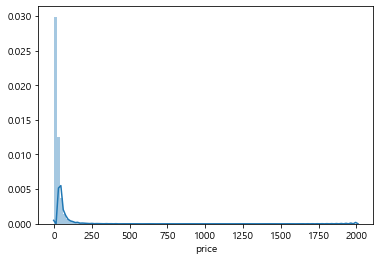

In [123]:
### mercari price data
plt.figure(figsize=(6, 4))
sns.distplot(y_train_df, bins=100)
plt.show()

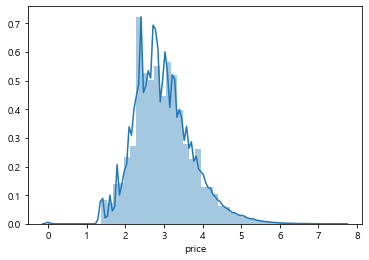

In [124]:
y_train_df_log = np.log1p(y_train_df)
sns.distplot(y_train_df_log, bins=50)
plt.show()

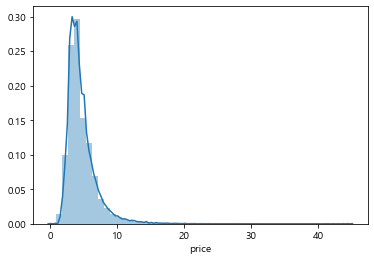

In [125]:
### (참고) Root 변환
# log보다 변환 강도가 낮음
sns.distplot(np.sqrt(y_train_df), bins=50)
plt.show()

### (2) Exponential Transformation
- Log Transformation의 반대 연산

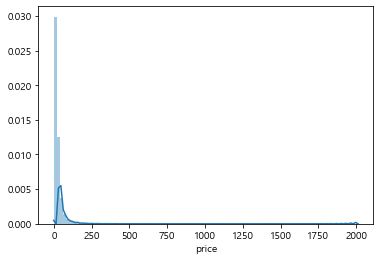

In [126]:
y_train_df_exp = np.exp(y_train_df_log)
sns.distplot(y_train_df_exp, bins=100)
plt.show()

### (3) Rank
- 순위 값으로 치환
- 비모수적 통계 적용할때 많이 사용

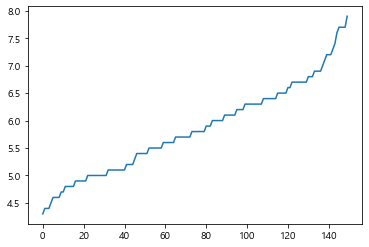

In [127]:
sepal_length = iris['sepal length (cm)'].sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length)
plt.show()

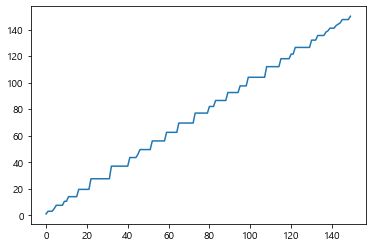

In [128]:
sepal_length_rank = iris['sepal length (cm)'].rank().sort_values(inplace=False).reset_index(drop=True)
sns.lineplot(data=sepal_length_rank)
plt.show()

### (4) Binning
- 구간 분할하여 categorical data로 변환
- cut 함수의 input은 numpy array

In [129]:
# 동일 길이로 나누기
bins = pd.cut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.296, 5.5]",59,0.393333
"(5.5, 6.7]",71,0.473333
"(6.7, 7.9]",20,0.133333


In [130]:
# 구간 값 정하고, 라벨 추가
bins = pd.cut(iris['sepal length (cm)'].values, bins=[4, 5, 6, 7, 8], labels=['bad', 'soso', 'med', 'good'])
bins.describe()

,counts,freqs
categories,,
bad,32,0.213333
soso,57,0.380000
med,49,0.326667
good,12,0.080000


In [131]:
# 동일 개수로 나누기
bins = pd.qcut(iris['sepal length (cm)'].values, 3)
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.4]",52,0.346667
"(5.4, 6.3]",56,0.373333
"(6.3, 7.9]",42,0.280000


In [132]:
# 구간에 들어갈 비율 조정
bins = pd.qcut(iris['sepal length (cm)'].values, [0, 0.25, 0.75, 1]) 
bins.describe()

,counts,freqs
categories,,
"(4.2989999999999995, 5.1]",41,0.273333
"(5.1, 6.4]",74,0.493333
"(6.4, 7.9]",35,0.233333


## Imbalance
- Weight 조정: 모델링 시 sample_weight 입력하여 적은 클래스의 가중치를 높임
- Default sampling strategy는 'not majority': 모든 클래스를 majority class의 크기로 맞춤

In [133]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN
from imblearn.over_sampling import SVMSMOTE
from imblearn.over_sampling import KMeansSMOTE

In [134]:
### Data generate
x, y = make_classification(n_samples=2000, n_features=6, weights=[0.95], flip_y=0)
pd.DataFrame(y).value_counts()

0    1900
1     100
dtype: int64

### (1) Random Under-sampling
- 데이터 개수 감소로 인한 성능 저하 주의

In [135]:
undersample=RandomUnderSampler(sampling_strategy='majority') # 가장 작은 사이즈에 맞춤
x_under, y_under = undersample.fit_resample(x, y)
pd.DataFrame(y_under).value_counts()

1    100
0    100
dtype: int64

In [136]:
undersample = RandomUnderSampler(sampling_strategy=0.5) # 2:1 비율로
x_under2, y_under2 = undersample.fit_resample(x, y)
pd.DataFrame(y_under2).value_counts()

0    200
1    100
dtype: int64

### (2) Random Over-sampling
- 성능에 유리하나, Overfitting 가능성이 있음

In [137]:
oversample = RandomOverSampler(sampling_strategy=0.5)
x_over, y_over = oversample.fit_resample(x, y)
pd.DataFrame(y_over).value_counts()

0    1900
1     950
dtype: int64

In [138]:
oversample = RandomOverSampler(sampling_strategy='minority') # 작은 사이즈 클래스를 큰 사이즈에 맞춤
x_over, y_over = oversample.fit_resample(x, y)
pd.DataFrame(y_over).value_counts()

1    1900
0    1900
dtype: int64

### (3) SMOTE
- 알고리즘이 가미된 Over-sampling으로 일반적인 Over-sampling보다 시간 소요가 긴 편
- SMOTE: 소수 레이블의 값과 K-NN 사이에 임의의 새로운 데이터 생성. Recall 상승에 최적이며 K-NN을 사용하므로 수치형 데이터에 사용하는 것이 좋음
    - SMOTEN: Nominal (Categorical) data
    - SMOTENC: Nominal and Continuous data. categorical_features를 리스트 형태의 파라미터로 제시해야 함
- BorderlineSMOTE: Borderline 부분에 대해서만 SMOTE 방식을 사용하는 것
    - 소수 범주의 데이터 한 개에 대해서 주변의 K개 데이터를 탐색하고 그중 다수 범주 데이터의 수를 확인
    - 주변 K개 데이터 중 다수 범주 데이터의 수가 K/2 ~ K 에 속할 경우 Danger 관측치라고 하는데, 이 관측치에 대해서만 SMOTE 적용
- ADASYN (Adaptive Synthetic Sampling): Borderline SMOTE 방법과 유사하나, 샘플링 개수를 데이터 위치에 따라 다르게 설정함
    - 모든 소수 범주 데이터에 대해 주변의 K개의 데이터를 탐색하고 다수 범주 데이터의 비율 계산
    - 소수 범주 데이터 주변의 다수 범주 데이터의 수에 따라 유동적으로 생성 가능
- SVMSMOTE: SVM의 hyperplane 경계면에 minor class 데이터 생성
- KMeansSMOTE: 데이터를 우선 클러스터링하여 minor class 데이터 주변으로 synthetic 데이터 생성
    - 전체 데이터 (major + minor)에 대해 KMeans clustering 수행 (default k=2)
    - major class의 데이터가 포함된 cluster는 oversampling 대상에서 제외
    - minor class 데이터만 존재하는 cluster에 대해 그 주변 값으로 synthetic data generate

#### Basic SMOTE

In [139]:
smote_sample = SMOTE(sampling_strategy='minority') 
x_sm, y_sm = smote_sample.fit_resample(x, y)
pd.DataFrame(y_sm).value_counts()

1    1900
0    1900
dtype: int64

#### Borderline SMOTE

In [140]:
b_smote_sample = BorderlineSMOTE(sampling_strategy='minority') 
x_bsm, y_bsm = b_smote_sample.fit_resample(x, y)
pd.DataFrame(y_bsm).value_counts()

1    1900
0    1900
dtype: int64

#### ADASYN (Adaptive Synthetic Sampling)

In [141]:
adasyn_sample = ADASYN(sampling_strategy='minority') 
x_ada, y_ada = adasyn_sample.fit_resample(x, y)
pd.DataFrame(y_ada).value_counts()

1    1907
0    1900
dtype: int64

#### SVM SMOTE

In [142]:
svm_smote_sample = SVMSMOTE(sampling_strategy='minority') 
x_ssm, y_ssm = svm_smote_sample.fit_resample(x, y)
pd.DataFrame(y_ssm).value_counts()

1    1900
0    1900
dtype: int64

#### K-means SMOTE

In [143]:
kmeans_smote_sample = KMeansSMOTE(sampling_strategy='minority', cluster_balance_threshold=0.1) 
x_ksm, y_ksm = kmeans_smote_sample.fit_resample(x, y)
pd.DataFrame(y_ksm).value_counts()

1    1901
0    1900
dtype: int64

### (4) Sampling Visualization

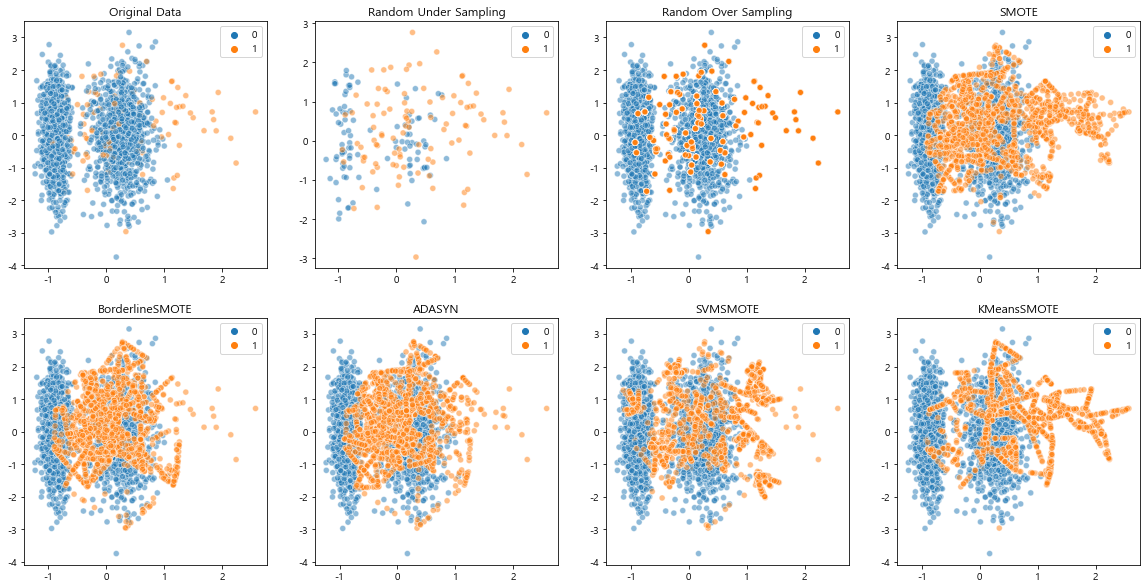

In [144]:
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))

sns.scatterplot(x=x[:, 1], y=x[:, 2], hue=y, ax=axes[0][0], alpha=0.5)
sns.scatterplot(x=x_under[:, 1], y=x_under[:,2], hue=y_under, ax=axes[0][1], alpha=0.5)
sns.scatterplot(x=x_over[:, 1], y=x_over[:, 2], hue=y_over, ax=axes[0][2], alpha=0.5)
sns.scatterplot(x=x_sm[:, 1], y=x_sm[:, 2], hue=y_sm, ax=axes[0][3], alpha=0.5)
sns.scatterplot(x=x_bsm[:, 1], y=x_bsm[:, 2], hue=y_bsm, ax=axes[1][0], alpha=0.5)
sns.scatterplot(x=x_ada[:, 1], y=x_ada[:, 2], hue=y_ada, ax=axes[1][1], alpha=0.5)
sns.scatterplot(x=x_ssm[:, 1], y=x_ssm[:, 2], hue=y_ssm, ax=axes[1][2], alpha=0.5)
sns.scatterplot(x=x_ksm[:, 1], y=x_ksm[:, 2], hue=y_ksm, ax=axes[1][3], alpha=0.5)

axes[0][0].set_title('Original Data')
axes[0][1].set_title('Random Under Sampling')
axes[0][2].set_title('Random Over Sampling')
axes[0][3].set_title('SMOTE')
axes[1][0].set_title('BorderlineSMOTE')
axes[1][1].set_title('ADASYN')
axes[1][2].set_title('SVMSMOTE')
axes[1][3].set_title('KMeansSMOTE')

plt.show()

## Dimensional reduction
- Sparsity를 줄이고, 모델 설명력을 높이기 위한 방법
- 데이터를 더 잘 설명할 수 있는 잠재적인 요소 추출
- 자료의 크기가 작을 경우 용이하고, 데이터가 크면 높은 차원이 유리할 수 있음

### (1) PCA
- Principal Component Analysis
- 자료의 변동이 최대한 보존되는 저차원 자료 생성
- SVD 알고리즘 기반으로 구현됨
-  PCA(SVD)는 반드시 StandardScaler로 스케일링 해야 함

#### PCA Pipeline

In [145]:
from sklearn.decomposition import PCA

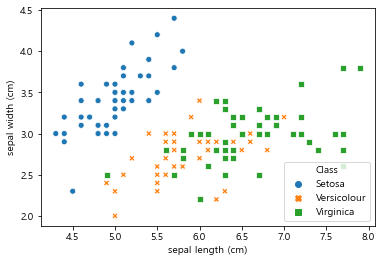

In [146]:
### iris data
sns.scatterplot(x=iris['sepal length (cm)'], y=iris['sepal width (cm)'], hue=iris.Class, style=iris.Class)
plt.show()

In [147]:
x = iris.drop(columns = 'Class') # 수치형 데이터만 추출
x = StandardScaler().fit_transform(x) # 수치형 변수 정규화

pd.DataFrame(x).head()

,0,1,2,3
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [148]:
# 주성분 추출
pca = PCA(n_components=len(iris.columns.difference(['Class'])))
pca_fit = pca.fit(x)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)
print("2개 주성분 분산 설명력 합:", np.sum(pca.explained_variance_ratio_[:2]))

고유 값 :  [20.92306556 11.7091661   4.69185798  1.76273239]
분산 설명력:  [0.72962445 0.22850762 0.03668922 0.00517871]
2개 주성분 분산 설명력 합: 0.9581320720000164


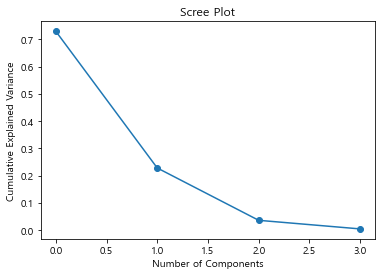

In [149]:
plt.title('Scree Plot')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.plot(pca.explained_variance_ratio_ , 'o-')
plt.show()

In [150]:
pca = PCA(n_components=2)                    
principal_components = pca.fit_transform(x)
principal_iris = pd.DataFrame(data = principal_components, columns = ['pc1', 'pc2']) 
principal_iris.head()

,pc1,pc2
0,-2.264703,0.480027
1,-2.080961,-0.674134
2,-2.364229,-0.341908
3,-2.299384,-0.597395
4,-2.389842,0.646835


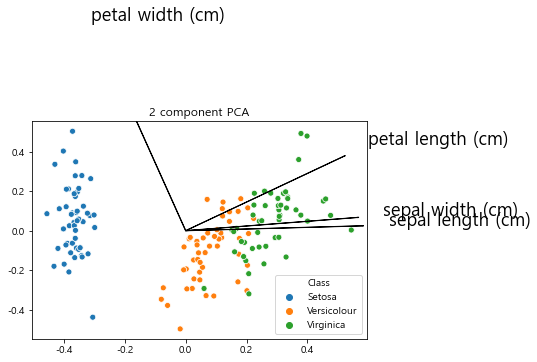

In [151]:
### Biplot
PC1 = pca.fit_transform(x)[:,0]
PC2 = pca.fit_transform(x)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = iris.columns.difference(['Class'])
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2, hue=iris.Class)
plt.title('2 component PCA')
plt.show()

In [152]:
### USArrest data
usarrests.head()

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [153]:
usarrests_scaled = StandardScaler().fit_transform(usarrests)
pd.DataFrame(usarrests_scaled).head()

,0,1,2,3
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814


In [154]:
pca = PCA(n_components=0.85) # 설명량의 합을 기준으로 pca 진행 가능
pca_fit = pca.fit(usarrests_scaled)

print("고유 값 : ", pca.singular_values_)
print("분산 설명력: ", pca.explained_variance_ratio_)
print("분산 설명력 합", np.sum(pca.explained_variance_ratio_)) # 설명력이 주어진 기준을 넘는 주성분 개수가 뽑힘

고유 값 :  [11.13607107  7.0347891 ]
분산 설명력:  [0.62006039 0.24744129]
분산 설명력 합 0.8675016829223337


In [155]:
pca = PCA(n_components=len(pca.explained_variance_ratio_))
principal_components = pca.fit_transform(usarrests_scaled)
principal_usarrests = pd.DataFrame(data = principal_components, columns=[f'pc{i+1}' for i in range(len(pca.explained_variance_ratio_))])
principal_usarrests.index = usarrests.index
principal_usarrests.head()

,pc1,pc2
Alabama,0.985566,1.133392
Alaska,1.950138,1.073213
Arizona,1.763164,-0.745957
Arkansas,-0.141420,1.119797
California,2.523980,-1.542934


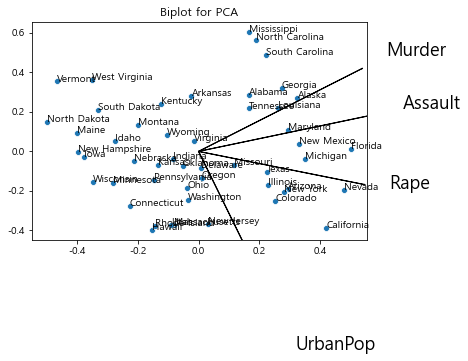

In [156]:
### Biplot
# 2개의 주성분만 그래프로 표현
PC1 = pca.fit_transform(usarrests_scaled)[:,0]
PC2 = pca.fit_transform(usarrests_scaled)[:,1]
ldngs = pca.components_

scalePC1 = 1.0/(PC1.max() - PC1.min())
scalePC2 = 1.0/(PC2.max() - PC2.min())
features = usarrests.columns
 
for i, feature in enumerate(features):
    plt.arrow(0, 0, ldngs[0, i], ldngs[1, i])
    plt.text(ldngs[0, i] * 1.15, 
             ldngs[1, i] * 1.15, 
             feature, fontsize=18)

sns.scatterplot(x=PC1 * scalePC1, y=PC2 * scalePC2)

for city in principal_usarrests.index:
    plt.annotate(city, (principal_usarrests.loc[city, 'pc1']*scalePC1, principal_usarrests.loc[city, 'pc2']*scalePC2))
    
plt.title('Biplot for PCA')
plt.show()

#### PCA for large data

In [157]:
### credit card data
print(card.shape)
card.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [158]:
card.rename(columns={'PAY_0': 'PAY_1', 'default payment next month': 'default'}, inplace=True)
x = card.drop('default', axis=1)
y = card['default']

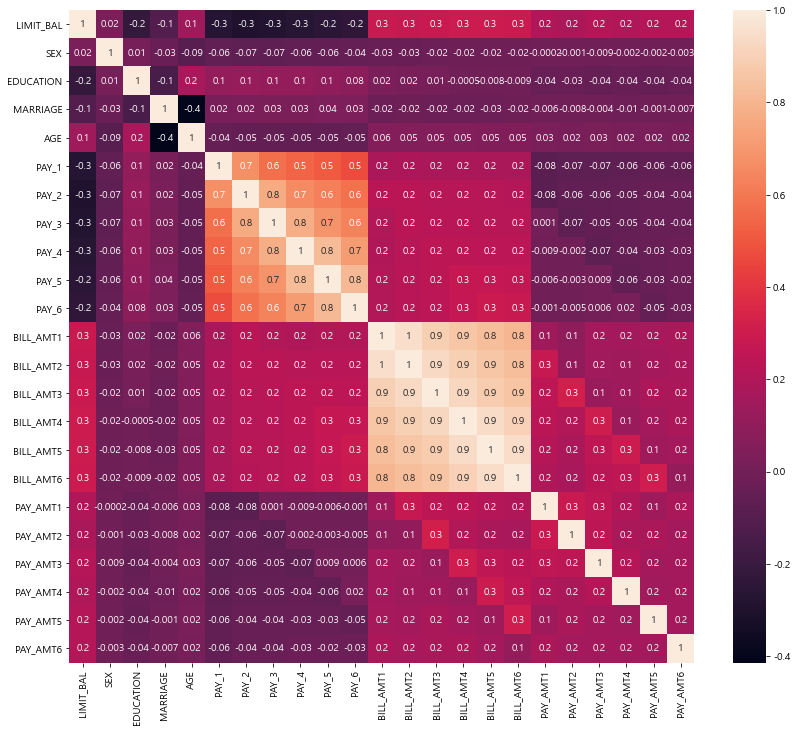

In [159]:
plt.figure(figsize=(14, 12))
sns.heatmap(x.corr(), annot=True, fmt='.1g')
plt.show()

In [160]:
# 상관성이 높은 변수만 PCA
# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 추출하고 scaling
cols_bill = ['BILL_AMT' + str(i) for i in range(1,7)]
scaler = StandardScaler()
bill_scaled = scaler.fit_transform(x[cols_bill])
x.loc[:, cols_bill] = bill_scaled

pca = PCA(n_components=2)
pca.fit(bill_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

PCA Component별 변동성: [0.90555253 0.0509867 ]


#### Random PCA
- 처음 d개의 주성분 근삿값을 빠르게 찾아 줌
- 속도가 빠름

In [161]:
card_scaled = pd.DataFrame(scaler.fit_transform(card), columns=card.columns)

In [162]:
rnd_pca = PCA(n_components=len(card.columns), svd_solver="randomized", random_state=42) # svd_solver를 randomized로 지정
x_reduced = rnd_pca.fit_transform(card_scaled)

#### Incremental PCA
- 조금씩 데이터를 쌓아가면서 PCA 구현
- 메모리 사용량 조절
- 일반적인 PCA와 결과물이 완벽하게 동일하지는 않으나, 상당히 유사함

In [163]:
from sklearn.decomposition import IncrementalPCA

In [164]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=len(card.columns))
for x_batch in np.array_split(card_scaled, n_batches):
    print(".", end="")
    inc_pca.partial_fit(x_batch)

x_reduced_inc = inc_pca.transform(card_scaled)

....................................................................................................

#### Kernel PCA

In [165]:
from sklearn.decomposition import KernelPCA

In [166]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

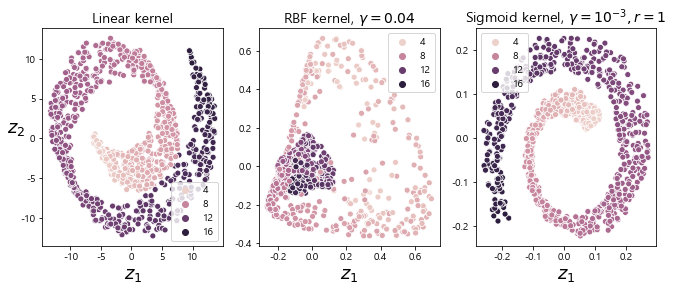

In [167]:
lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9
plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"),
                            (132, rbf_pca, "RBF kernel, $\gamma=0.04$"),
                            (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    x_reduced = pca.fit_transform(x)
    if subplot == 132:
        x_reduced_rbf = x_reduced
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)

plt.show()

In [168]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import mean_squared_error

In [169]:
### (참고) Hyperparameter tuning with kernels
clf = Pipeline([("kpca", KernelPCA(n_components=2)), ("log_reg", LogisticRegression(solver="lbfgs"))])

param_grid = [{"kpca__gamma": np.linspace(0.03, 0.05, 10), "kpca__kernel": ["rbf", "sigmoid"]}]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(x, y)
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

### (2) LLE
- Locally Linear Embedding
- 비선형 차원 축소
- 각 train sample이 가장 가까운 이웃과 얼마나 선형적으로 연관되는지 측정
- 큰 데이터에는 적용 어려움

In [170]:
x, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [171]:
from sklearn.manifold import LocallyLinearEmbedding

In [172]:
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
x_reduced = lle.fit_transform(x)

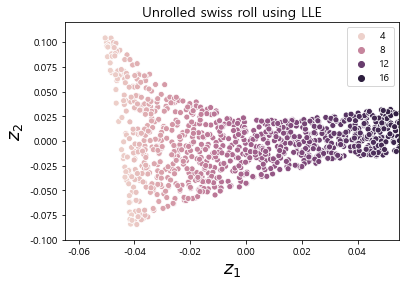

In [173]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
sns.scatterplot(x=x_reduced[:, 0], y=x_reduced[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.show()

### (3) Isomap
- 각 sample을 가장 가까운 이웃과 연결
- sample들의 geodesic distance (두 노드의 최단거리 노드 개수) 유지하면서 차원 축소

In [174]:
from sklearn.manifold import Isomap

In [175]:
isomap = Isomap(n_components=2)
x_reduced_isomap = isomap.fit_transform(x)

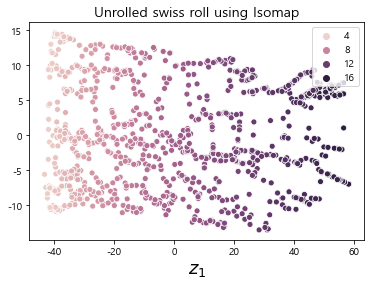

In [176]:
plt.title("Unrolled swiss roll using Isomap", fontsize=14)
sns.scatterplot(x=x_reduced_isomap[:, 0], y=x_reduced_isomap[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

### (4) t-SNE
- t-distributed Stochastic Neighbor Embedding
- 비슷한 sample은 가까이, 비슷하지 않은 sample은 멀리 
- 쿨백-라이블러 발산 (KLD) 최소화
- 주로 2D 시각화에 사용

In [177]:
from sklearn.manifold import TSNE

In [178]:
tsne = TSNE(n_components=2, random_state=42)
x_reduced_tsne = tsne.fit_transform(x)

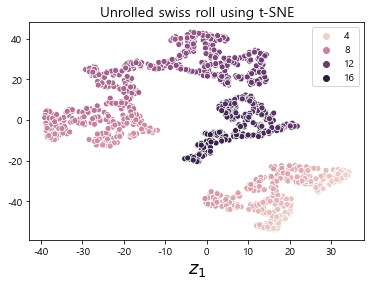

In [179]:
plt.title("Unrolled swiss roll using t-SNE", fontsize=14)
sns.scatterplot(x=x_reduced_tsne[:, 0], y=x_reduced_tsne[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

### (5) MDS
- Multidimensional Scaling
- 여러 대상 간의 거리가 주어져 있고, 동일한 상대적 거리를 가진 실수공간의 점들로 배치시키는 방법
- 데이터 포인트의 유사성을 학습하여 자료들의 상대적 관계 이해

In [180]:
from sklearn.manifold import MDS

In [181]:
mds = MDS(n_components=2, random_state=42)
x_reduced_mds = mds.fit_transform(x)

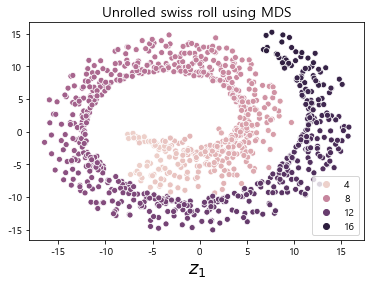

In [182]:
plt.title("Unrolled swiss roll using MDS", fontsize=14)
sns.scatterplot(x=x_reduced_mds[:, 0], y=x_reduced_mds[:, 1], hue=t)
plt.xlabel("$z_1$", fontsize=18)
plt.show()

In [183]:
### eurodist data
eurodist.head()

,Athens,Barcelona,Brussels,Calais,Cherbourg,Cologne,Copenhagen,Geneva,Gibraltar,Hamburg,...,Lisbon,Lyons,Madrid,Marseilles,Milan,Munich,Paris,Rome,Stockholm,Vienna
city,,,,,,,,,,,,,,,,,,,,,
Athens,0,3313,2963,3175,3339,2762,3276,2610,4485,2977,...,4532,2753,3949,2865,2282,2179,3000,817,3927,1991
Barcelona,3313,0,1318,1326,1294,1498,2218,803,1172,2018,...,1305,645,636,521,1014,1365,1033,1460,2868,1802
Brussels,2963,1318,0,204,583,206,966,677,2256,597,...,2084,690,1558,1011,925,747,285,1511,1616,1175
Calais,3175,1326,204,0,460,409,1136,747,2224,714,...,2052,739,1550,1059,1077,977,280,1662,1786,1381
Cherbourg,3339,1294,583,460,0,785,1545,853,2047,1115,...,1827,789,1347,1101,1209,1160,340,1794,2196,1588


In [184]:
mds = MDS()
eurodist_transform = mds.fit_transform(eurodist)
eurodist_transform_df = pd.DataFrame(eurodist_transform)
eurodist_transform_df.index = eurodist.index
eurodist_transform_df.columns = ['x', 'y']

In [185]:
eurodist_transform_df.head()

,x,y
city,,
Athens,4213.105813,7426.846972
Barcelona,-2780.051135,467.359497
Brussels,178.244332,-2671.369798
Calais,-97.145223,-2521.711139
Cherbourg,-969.702759,-2000.404660


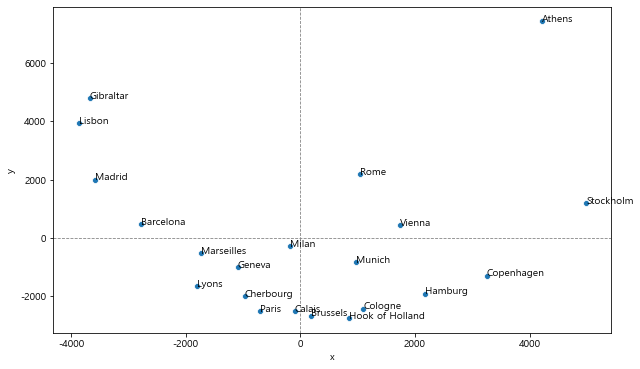

In [186]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=eurodist_transform_df['x'], y=eurodist_transform_df['y'])

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)

for language in eurodist_transform_df.index:
    plt.annotate(language, (eurodist_transform_df.loc[language, 'x'], eurodist_transform_df.loc[language, 'y']))
    
plt.show()

### (6) CA
- Correspondence Analysis
- MDS의 범주형 버전
- 범주형 변수(수준)들 간의 연관성을 분석한 후, 그 결과를 시각적 해석이 용이하도록 그래프화
- 범주형 변수의 빈도를 나타내고 있는 빈도교차표의 행과 열(명목변수의 범주 값들)을 그래프상의 자극점 형태로 표시하는 방법
- 단순 상응분석은 2개의 변수, 다중 상응분석은 3개 이상의 변수 활용
- 카이제곱 검정과 같이 범주형 변수간의 상호연관성을 바탕으로 진행되므로, 범주형 변수가 서로 연관성을 가지고 있다는 전제가 필요함

#### Simple CA

In [187]:
# !pip install prince
import prince

In [188]:
x = pd.DataFrame(data=[[326, 38, 241, 110, 3], [688, 116, 584, 188, 4], [343, 84, 909, 412, 26], [98, 48, 403, 681, 85]],
                 columns=pd.Series(['Fair', 'Red', 'Medium', 'Dark', 'Black']), index=pd.Series(['Blue', 'Light', 'Medium', 'Dark']))

x.columns.rename('Hair color', inplace=True)
x.index.rename('Eye color', inplace=True)
x.head()

Hair color,Fair,Red,Medium,Dark,Black
Eye color,,,,,
Blue,326,38,241,110,3
Light,688,116,584,188,4
Medium,343,84,909,412,26
Dark,98,48,403,681,85


In [189]:
ca = prince.CA()
ca.fit(x)

CA()

In [190]:
### row coordinates
coords_r = ca.row_coordinates(x)
coords_r.columns = ['x', 'y']
coords_r

,x,y
Blue,-0.400300,-0.165411
Light,-0.440708,-0.088463
Medium,0.033614,0.245002
Dark,0.702739,-0.133914


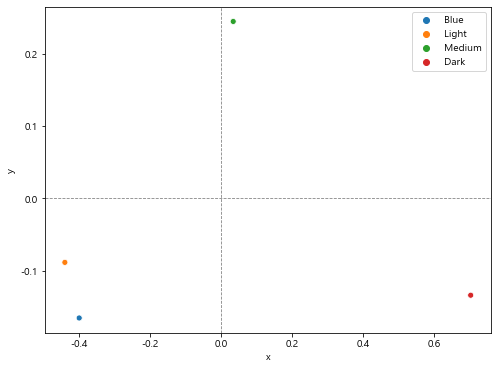

In [191]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_r, hue=coords_r.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [192]:
### column coordinates
coords_c = ca.column_coordinates(x)
coords_c.columns = ['x', 'y']
coords_c

,x,y
Fair,-0.543995,-0.173844
Red,-0.233261,-0.048279
Medium,-0.042024,0.208304
Dark,0.588709,-0.103950
Black,1.094388,-0.286437


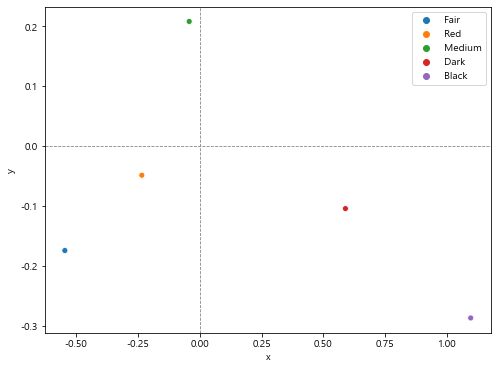

In [193]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords_c, hue=coords_c.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

#### Multiple CA

In [194]:
stretch.columns = ['Color', 'Size', 'Action', 'Age', 'Inflated']
stretch.head()

,Color,Size,Action,Age,Inflated
0,YELLOW,SMALL,STRETCH,ADULT,T
1,YELLOW,SMALL,STRETCH,CHILD,F
2,YELLOW,SMALL,DIP,ADULT,F
3,YELLOW,SMALL,DIP,CHILD,F
4,YELLOW,LARGE,STRETCH,ADULT,T


In [195]:
mca = prince.MCA()
mca.fit_transform(stretch)

,0,1
0,0.705387,8.276357e-15
1,-0.386586,7.093742e-15
2,-0.386586,6.264339e-15
3,-0.852014,6.010726e-15
4,0.783539,-6.333333e-01
5,0.783539,-6.333333e-01
6,-0.308434,-6.333333e-01
7,-0.308434,-6.333333e-01
8,-0.773862,-6.333333e-01
9,0.783539,6.333333e-01


In [196]:
### 차원 좌표
coords = mca.column_coordinates(stretch)
coords.columns = ['x', 'y']
coords

,x,y
Color_PURPLE,0.117308,6.892024e-01
Color_YELLOW,-0.130342,-7.657805e-01
Size_LARGE,0.117308,-6.892024e-01
Size_SMALL,-0.130342,7.657805e-01
Action_DIP,-0.853864,-1.587709e-15
Action_STRETCH,0.620992,1.114039e-15
Age_ADULT,0.620992,2.845316e-16
Age_CHILD,-0.853864,-5.250607e-16
Inflated_F,-0.731466,-8.513801e-16
Inflated_T,1.253942,1.201154e-15


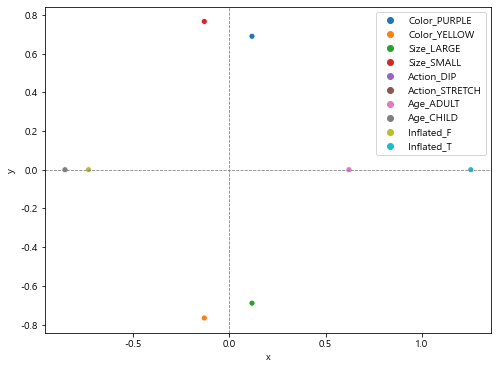

In [197]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', data=coords, hue=coords.T.columns)

plt.axhline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='dashed', linewidth=0.8)
plt.show()

In [198]:
mca.eigenvalues_

[0.40165656560133794, 0.2111111111111111]

In [199]:
mca.total_inertia_

1.0

### (7) LDA
- Linear Discriminant Analysis
- 분류 알고리즘으로 사용되기도 함
- Train 과정에서 class를 가장 잘 구분하는 축 학습
- 클래스 내 분산과 클래스 내부 분산의 비율 최대화
- StandardScaler로 스케일링 해야 함

In [200]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [201]:
x = loan3000[['borrower_score', 'payment_inc_ratio']]
y = loan3000['outcome']

pd.concat([x, y], axis=1)

,borrower_score,payment_inc_ratio,outcome
0,0.40,5.11135,paid off
1,0.40,5.43165,default
2,0.70,9.23003,paid off
3,0.40,2.33482,paid off
4,0.45,12.10320,default
...,...,...,...
2995,0.50,18.36620,paid off
2996,0.60,1.80421,paid off
2997,0.20,15.42180,default
2998,0.45,8.92335,default


In [202]:
loan_lda = LinearDiscriminantAnalysis()
loan_lda.fit(x, y)
pd.DataFrame(loan_lda.scalings_, index=x.columns)

,0
borrower_score,7.175839
payment_inc_ratio,-0.099676


In [203]:
pred = pd.DataFrame(loan_lda.predict_proba(loan3000[['borrower_score', 'payment_inc_ratio']]), columns=loan_lda.classes_)
pred.head()

,default,paid off
0,0.553544,0.446456
1,0.558953,0.441047
2,0.272696,0.727304
3,0.506254,0.493746
4,0.609952,0.390048


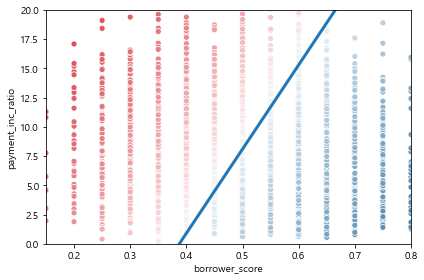

In [204]:
# Use scalings and center of means to determine decision boundary
center = np.mean(loan_lda.means_, axis=0)
slope = - loan_lda.scalings_[0] / loan_lda.scalings_[1]
intercept = center[1] - center[0] * slope

# payment_inc_ratio for borrower_score of 0 and 20
x_0 = (0 - intercept) / slope
x_20 = (20 - intercept) / slope

lda_df = pd.concat([loan3000, pred['default']], axis=1)
lda_df.head()

sns.scatterplot(x='borrower_score', y='payment_inc_ratio', hue='default', data=lda_df, 
                palette=sns.diverging_palette(240, 10, n=9, as_cmap=True), legend=False)

plt.plot((x_0, x_20), (0, 20), linewidth=3)

plt.ylim(0, 20)
plt.xlim(0.15, 0.8)


plt.tight_layout()
plt.show()

In [205]:
### iris data
x = iris.drop(columns = 'Class')
iris_scaled = StandardScaler().fit_transform(x)

In [206]:
lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.Class)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


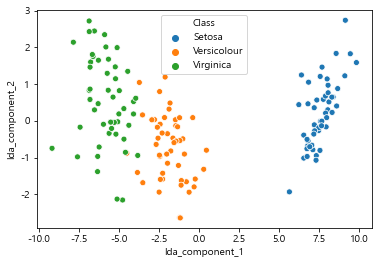

In [207]:
lda_columns = ['lda_component_1', 'lda_component_2']
iris_lda = pd.DataFrame(iris_lda, columns=lda_columns)
sns.scatterplot(x=iris_lda['lda_component_1'], y=iris_lda['lda_component_2'], hue=iris.Class)
plt.show()

### (8) QDA
- Quadratic Discriminant Analysis
- 2차 판별분석

In [208]:
# 데이터 생성
x = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

In [209]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [210]:
clf = QuadraticDiscriminantAnalysis()
clf.fit(x, y)

QuadraticDiscriminantAnalysis()

In [211]:
clf.predict([[-0.8, -1]])

array([1])

### (9) ICA
- Independent Component Analysis
- Feature에 들어있는 독립 신호 추출
- 독립적인 feature를 추출하려고 하기 때문에, 새로운 각 축은 직교하지 않을 수 있음 (PCA와의 차이점)
- 신호 처리 작업에 주로 사용

In [212]:
from sklearn.decomposition import FastICA

In [213]:
fastICA = FastICA(n_components=2, algorithm='parallel', max_iter=100, random_state=1)
x_iris_ica = fastICA.fit_transform(iris_scaled)

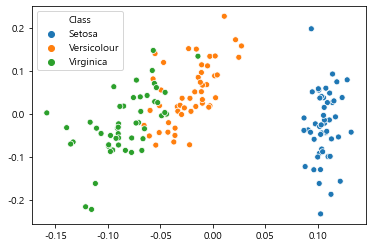

In [214]:
sns.scatterplot(x=x_iris_ica.T[0], y=x_iris_ica.T[1], hue=iris.Class)
plt.show()

### (10) SVD
- Singular Value Decomposition
- 희소 행렬의 변환 가능
- 패턴 인식, 토픽 모델링, 문서 클러스터링, 상품 추천 등

#### SVD Basics

In [215]:
from numpy.linalg import svd
from scipy.sparse.linalg import svds

In [216]:
# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4, 4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [217]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


In [218]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [219]:
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [220]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('Sigma Value:\n',np.round(Sigma,3))

(4, 4) (4,) (4, 4)
Sigma Value:
 [2.663 0.807 0.    0.   ]


In [221]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


#### Truncated SVD

In [222]:
# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

In [223]:
from sklearn.decomposition import TruncatedSVD, PCA

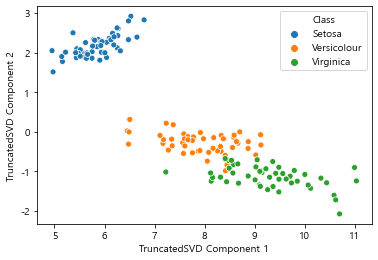

In [224]:
### TruncatedSVD from scikit-learn
# 분해한 행렬을 반환하지는 않고, 차원 축소 변환
iris_ftrs = iris.iloc[:, :4]

# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

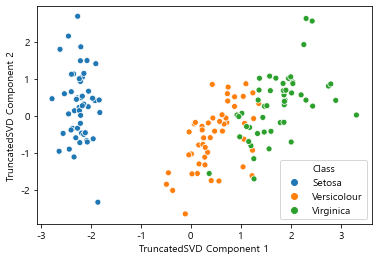

In [225]:
# StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# TruncatedSVD 변환 데이터 표현
# PCA 축소 결과와 거의 동일
sns.scatterplot(x=iris_tsvd[:,0], y=iris_tsvd[:,1], hue=iris.Class)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')
plt.show()

### (11) NMF
- Non-Negative Matrix Factorization
- SVD와 유사한, 낮은 랭크 행렬 근사 방법
- 사용 분야도 SVD와 유사
- 원본 행렬이 모두 양수일 때, 두 개의 양수 행렬로 분해
- 스케일링 하면 안됨, 하더라도 MinMaxScaler 해야 함

In [226]:
from sklearn.decomposition import NMF

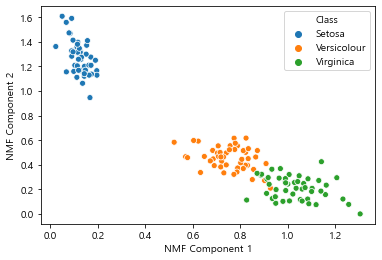

In [227]:
iris_ftrs = iris.iloc[:, :4]

nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

sns.scatterplot(x=iris_nmf[:,0], y=iris_nmf[:,1], hue=iris.Class)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

### (12) FA
- Factor Analysis (요인분석)
- 유사한 변수를 묶어 다중공선성을 줄이는 것이 목적
- 공동 요인을 이용하여 변수의 상관 구조 분석
- Clustering과 유사하나, 분석가의 사전 지식이 어느 정도 필요함
- 사회과학 변수의 타당성과 관련 있음

In [228]:
bfi.drop(['gender', 'education', 'age'], axis=1, inplace=True)
bfi.dropna(inplace=True)
bfi.head()

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,...,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,...,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,...,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,...,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,...,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,...,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0


In [229]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [230]:
### 데이터 세트의 “인자 가능성”을 평가
# 요인 분석 가능성은 “데이터 세트에서 요인을 찾을 수 있는가?”를 의미함
# 바틀렛 테스트: 관측된 변수가 단위 행렬과 상호 관련되는지 여부를 확인. 귀무가설을 기각해야 요인분석 진행 가능
# -> H0: 모집단의 상관행렬은 단위행렬과 동일하다 / H1:  모집단의 상관행렬은 단위행렬과 동일하지 않다
chi_square_value, p_value = calculate_bartlett_sphericity(bfi)
chi_square_value, p_value # 유의함.

(18170.966350869254, 0.0)

In [231]:
# KMO(Kaiser-Meyer-Olkin) 테스트
# -> 요인 분석에 대한 데이터의 적합성 측정. 모든 관측 변수 간의 분산 비율을 추정하며, KMO 값의 범위는 0에서 1 사이
# -> 0.6 미만의 KMO 값은 부적합한 것으로 간주함
kmo_all, kmo_model = calculate_kmo(bfi)
kmo_model

0.848539722194922

In [232]:
from factor_analyzer import FactorAnalyzer

In [233]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(bfi, 25)

# Check Eigenvalues
ev, v = fa.get_eigenvalues()
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

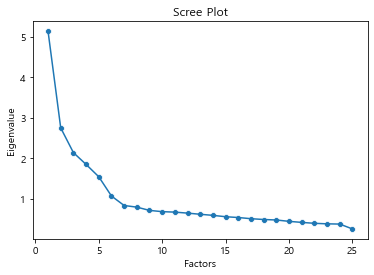

In [234]:
# Create scree plot
sns.scatterplot(x=range(1, bfi.shape[1]+1), y=ev)
sns.lineplot(x=range(1, bfi.shape[1]+1), y=ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.show()

In [235]:
# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer(5, rotation="varimax")
fa.fit(bfi)

FactorAnalyzer(n_factors=5, rotation='varimax', rotation_kwargs={})

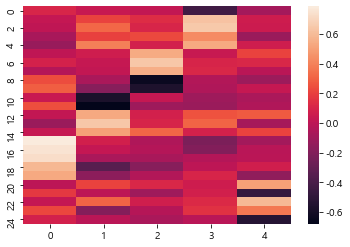

In [236]:
# 요인 적재량
sns.heatmap(pd.DataFrame(fa.loadings_))

In [237]:
# SS Loadings
# Proportion Var
# Cumulative Var
fa.get_factor_variance()

(array([2.70963262, 2.47308982, 2.04110564, 1.844498  , 1.52215297]),
 array([0.1083853 , 0.09892359, 0.08164423, 0.07377992, 0.06088612]),
 array([0.1083853 , 0.2073089 , 0.28895312, 0.36273304, 0.42361916]))

In [238]:
from sklearn.decomposition import FactorAnalysis

In [239]:
### FA with Scikit-learn
fa = FactorAnalysis(n_components=5)
fa.fit(bfi)

FactorAnalysis(n_components=5)

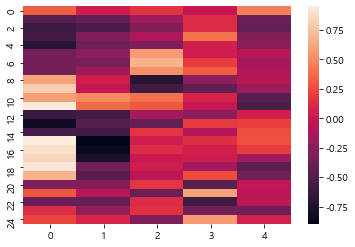

In [240]:
### 요인 적재 행렬 
sns.heatmap(pd.DataFrame(fa.components_).T)

In [241]:
# The estimated noise variance for each feature
fa.noise_variance_ 

array([1.63948936, 0.79959992, 0.80401417, 1.5220757 , 0.82419538,
       1.00515335, 0.9897638 , 1.12694924, 0.96456765, 1.49181394,
       1.67908697, 1.18046475, 1.01763303, 1.00548583, 1.067968  ,
       0.68998572, 0.79163628, 1.20884314, 1.2495894 , 1.7524464 ,
       0.85538357, 1.79549585, 0.75626997, 1.07088509, 1.26833739])

In [242]:
bfi_trans_df = pd.DataFrame(fa.transform(bfi))
bfi_trans_df

,0,1,2,3,4
0,0.699751,0.975699,-1.287079,0.739315,0.931474
1,0.056338,-0.071712,-0.728433,-0.103563,0.429821
2,0.479061,-0.442499,0.261150,-0.259592,0.739260
3,0.386925,0.462680,-1.242410,0.477105,0.057517
4,-0.005560,0.472119,-0.203096,0.418761,0.907245
...,...,...,...,...,...
2431,1.868891,-0.140145,0.913255,-0.492293,0.096632
2432,0.523539,-0.686007,-0.082672,-1.188767,0.183320
2433,-0.513746,-0.316384,1.016175,-0.680098,1.123061
2434,0.900812,-0.598711,0.711119,-0.868186,1.796170


### (13) RA
- Reliability Analysis: Internal consistency (내적 일관성 분석, 사회과학 변수의 신뢰도와 관련)
- 요인분석과 동시에 진행하는 경우가 많음
- 주로 조사 데이터에 활용하며, 신뢰성을 평가하여 신뢰성이 낮은 컬럼 제외
- 하나의 개념을 측정하기 위해 여러 개의 하위 측정항목들이 존재할 경우 이들 측정 값 사이의 상관관계를 분석하여 신뢰성을 평가하는 방법
- 크론바흐 알파계수 활용 (계수 >= 0.6 신뢰성이 존재, 계수 >= 0.7신뢰성이 높음)
- 크론바흐 알파계수가 낮을 경우에는 측정 항목들 간의 내적일관성이 떨어지는 것을 의미하므로 다른 측정 항목들과 상관관계가 낮은 측정항목을 제거하여 내적일관성을 향상시킬 수 있음
- 하나의 개념에 대해 신뢰성과 타당성을 평가하기 위한 최소의 항목 수는 3개이므로 가급적 모든 개념의 측정 항목 수는 3개 이상으로 유지하는 것이 중요

In [243]:
# enter survey responses as a DataFrame
df = pd.DataFrame({'Q1': [1, 2, 2, 3, 2, 2, 3, 3, 2, 3],
                   'Q2': [1, 1, 1, 2, 3, 3, 2, 3, 3, 3],
                   'Q3': [1, 1, 2, 1, 2, 3, 3, 3, 2, 3]})
df

,Q1,Q2,Q3
0,1,1,1
1,2,1,1
2,2,1,2
3,3,2,1
4,2,3,2
5,2,3,3
6,3,2,3
7,3,3,3
8,2,3,2
9,3,3,3


In [244]:
import pingouin as pg

In [245]:
pg.cronbach_alpha(data=df)

(0.7734375, array([0.336, 0.939]))

## Time-series Data
- 분해 시계열: 추세요인, 계절요인, 순환요인, 불규칙요인 (잔차)
- Multiplicative(추세에 따른 계절성이 있는 경우), Additvie(추세와 계절성이 별도로 존재하는 경우)

In [246]:
arima_data.head()

,day,price
0,2013-01-01,3794
1,2013-02-01,3863
2,2013-03-01,5190
3,2013-04-01,5783
4,2013-05-01,6298


In [247]:
arima_data['day'] = pd.to_datetime(arima_data['day'], format="%Y-%m-%d")
arima_data.set_index('day', inplace=True)
arima_data.head(3)

,price
day,
2013-01-01,3794
2013-02-01,3863
2013-03-01,5190


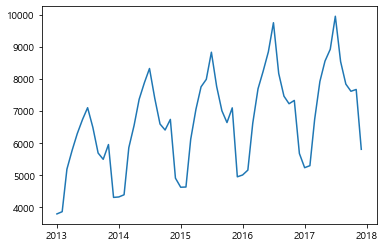

In [248]:
plt.plot(arima_data.index, arima_data['price'])
plt.show()

In [249]:
### ldeaths data
ldeaths.head()

,time,value
0,1974.000000,3035
1,1974.083333,2552
2,1974.166667,2704
3,1974.250000,2554
4,1974.333333,2014


In [250]:
# 시간 변환
ldeaths['time'] = pd.Series([f'{y}-{m+1}' for y in range(1974, 1980) for m in range(12)])
ldeaths.head()

,time,value
0,1974-1,3035
1,1974-2,2552
2,1974-3,2704
3,1974-4,2554
4,1974-5,2014


In [251]:
from matplotlib import dates

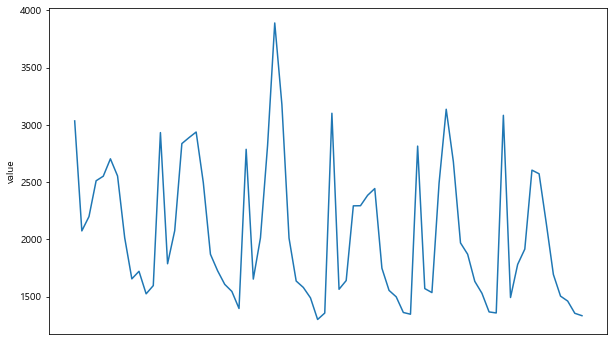

In [252]:
plt.figure(figsize=(10, 6))
ax = plt.axes()            
plt.xticks(rotation=15)
    
ax.xaxis.set_major_locator(dates.DayLocator(interval=50))
ax.xaxis.set_major_formatter(dates.DateFormatter('%Y'))

sns.lineplot(x='time', y='value', data=ldeaths, ax=ax)
plt.show()

In [253]:
ldeaths['time'] = pd.to_datetime(ldeaths['time'], format="%Y-%m")
ldeaths.set_index('time', inplace=True)
ldeaths.head(3)

,value
time,
1974-01-01,3035
1974-02-01,2552
1974-03-01,2704


### (1) Seasonal decomposition

In [254]:
from statsmodels.tsa.seasonal import seasonal_decompose

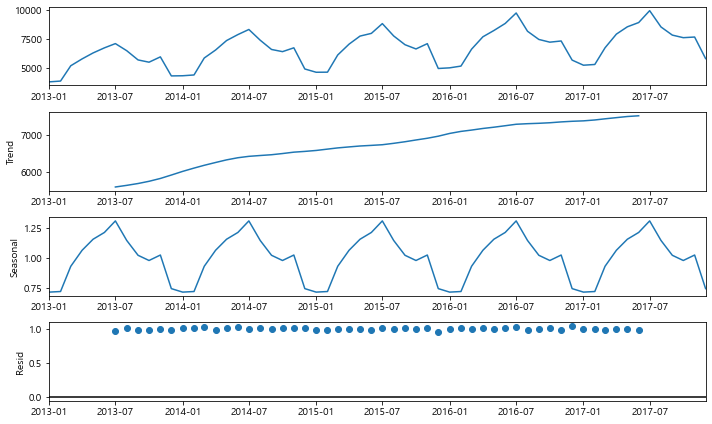

In [255]:
### Seasonal decomposition
ts = arima_data
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

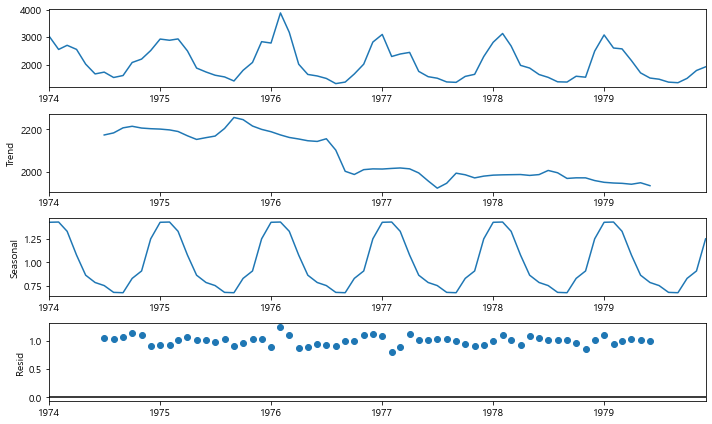

In [256]:
ts = ldeaths
result = seasonal_decompose(ts, model='multiplicative')
plt.rcParams['figure.figsize'] = [10, 6]
result.plot()
plt.show()

### (2) Resample
- 시간 단위별로 grouping
    - Y, M, D, H, T(min), S등의 rule 지정
- 시간 컬럼을 index로 지정하거나, on parameter 이용
- groupby와 유사하며, groupby와 함께 이용하는 것도 가능

In [257]:
birth_data.reset_index(drop=True, inplace=True)

In [258]:
birth_data['Date'] = pd.to_datetime(birth_data['Date']) # DateTime으로 변경 후 index로 지정
# birth_data.set_index('Date', drop=True, inplace=True)
birth_data.head()

,Date,Births
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [259]:
birth_data.resample(rule='2D', closed='right', label='right', on='Date').mean() # 2일 평균을 계산하되, 부등호와 label 값은 오른쪽(최신) 값으로

,Births
Date,
1959-01-01,35.0
1959-01-03,31.0
1959-01-05,37.5
1959-01-07,37.0
1959-01-09,40.5
...,...
1959-12-23,39.5
1959-12-25,41.0
1959-12-27,35.5


In [260]:
birth_data.resample(rule='3M', on='Date').sum() # 3개월 단위로 sum

,Births
Date,
1959-01-31,1213
1959-04-30,3561
1959-07-31,3720
1959-10-31,4165
1960-01-31,2664


### (3) Upsampling/Downsampling
- Resample 메소드를 사용한 시간 단위 변경

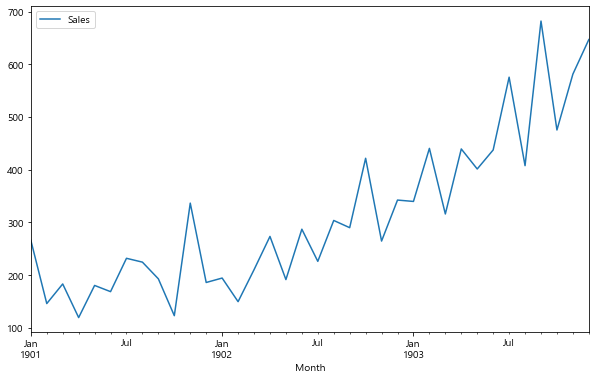

In [261]:
shampoo.plot()
plt.show()

#### Upsampling

In [262]:
upsampled = shampoo.resample('D').mean() # Day frequency
upsampled

,Sales
Month,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN
...,...
1903-11-27,NaN
1903-11-28,NaN
1903-11-29,NaN


In [263]:
print(shampoo.shape, upsampled.shape)

(36, 1) (1065, 1)


In [264]:
ts

,value
time,
1974-01-01,3035
1974-02-01,2552
1974-03-01,2704
1974-04-01,2554
1974-05-01,2014
...,...
1979-08-01,1354
1979-09-01,1333
1979-10-01,1492


In [265]:
rng = pd.date_range('2019-12-31', periods=3, freq='5S')
ts = pd.DataFrame(np.array([0, 1, 3, 2, 10, 3]).reshape(3, 2), index=rng, columns=['col_1', 'col_2'])
ts

,col_1,col_2
2019-12-31 00:00:00,0,1
2019-12-31 00:00:05,3,2
2019-12-31 00:00:10,10,3


In [266]:
ts_upsample = ts.resample('S').mean() # Second frequency로 평균 시간 만들기
ts_upsample

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,NaN,NaN
2019-12-31 00:00:02,NaN,NaN
2019-12-31 00:00:03,NaN,NaN
2019-12-31 00:00:04,NaN,NaN
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,NaN,NaN
2019-12-31 00:00:07,NaN,NaN
2019-12-31 00:00:08,NaN,NaN
2019-12-31 00:00:09,NaN,NaN


#### Downsampling (merge)

In [267]:
resample = shampoo.resample('Q') # Quarter-aware
quarterly_mean_sales = resample.mean()

In [268]:
quarterly_mean_sales.shape

(12, 1)

In [269]:
# Time 단위 downsampling
index = pd.date_range('1/1/2000', periods=9, freq='T')
series = pd.Series(range(9), index=index)
series

2000-01-01 00:00:00    0
2000-01-01 00:01:00    1
2000-01-01 00:02:00    2
2000-01-01 00:03:00    3
2000-01-01 00:04:00    4
2000-01-01 00:05:00    5
2000-01-01 00:06:00    6
2000-01-01 00:07:00    7
2000-01-01 00:08:00    8
Freq: T, dtype: int64

In [270]:
series.resample('3T').sum() # 3시간 단위로 sum 하되, label은 가장 빠른 시간으로

2000-01-01 00:00:00     3
2000-01-01 00:03:00    12
2000-01-01 00:06:00    21
Freq: 3T, dtype: int64

In [271]:
series.resample('3T', label='right').sum() # label을 마지막 시간으로

2000-01-01 00:03:00     3
2000-01-01 00:06:00    12
2000-01-01 00:09:00    21
Freq: 3T, dtype: int64

In [272]:
series.resample('3T', label='right', closed='right').sum() # 오른쪽 부등호에 등호 붙이기

2000-01-01 00:00:00     0
2000-01-01 00:03:00     6
2000-01-01 00:06:00    15
2000-01-01 00:09:00    15
Freq: 3T, dtype: int64

### (4) Missing Value

#### Fill NA

In [273]:
# ts_upsample.ffill()
# 앞의 값으로 채우기
ts_upsample.fillna(method='ffill')

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.0,1.0
2019-12-31 00:00:02,0.0,1.0
2019-12-31 00:00:03,0.0,1.0
2019-12-31 00:00:04,0.0,1.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


In [274]:
# ts_upsample.bfill()
# 뒤의 값으로 채우기
ts_upsample.fillna(method='bfill')

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,3.0,2.0
2019-12-31 00:00:02,3.0,2.0
2019-12-31 00:00:03,3.0,2.0
2019-12-31 00:00:04,3.0,2.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,10.0,3.0
2019-12-31 00:00:07,10.0,3.0
2019-12-31 00:00:08,10.0,3.0
2019-12-31 00:00:09,10.0,3.0


In [275]:
# 평균으로 채우기 
ts_upsample.fillna(ts_upsample.mean())

,col_1,col_2
2019-12-31 00:00:00,0.000000,1.0
2019-12-31 00:00:01,4.333333,2.0
2019-12-31 00:00:02,4.333333,2.0
2019-12-31 00:00:03,4.333333,2.0
2019-12-31 00:00:04,4.333333,2.0
2019-12-31 00:00:05,3.000000,2.0
2019-12-31 00:00:06,4.333333,2.0
2019-12-31 00:00:07,4.333333,2.0
2019-12-31 00:00:08,4.333333,2.0
2019-12-31 00:00:09,4.333333,2.0


In [276]:
# 중앙값으로 채우기 
ts_upsample.fillna(ts_upsample.median())

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,3.0,2.0
2019-12-31 00:00:02,3.0,2.0
2019-12-31 00:00:03,3.0,2.0
2019-12-31 00:00:04,3.0,2.0
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,3.0,2.0
2019-12-31 00:00:07,3.0,2.0
2019-12-31 00:00:08,3.0,2.0
2019-12-31 00:00:09,3.0,2.0


#### Interpolation
- 시계열 데이터의 앞, 뒤 데이터 확인하여 결측치 보정

In [277]:
ts_upsample.interpolate(method='values') # 값 기준 선형 보간

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


In [278]:
ts_upsample.interpolate(method='time') # 시간 기준 선형 보간

,col_1,col_2
2019-12-31 00:00:00,0.0,1.0
2019-12-31 00:00:01,0.6,1.2
2019-12-31 00:00:02,1.2,1.4
2019-12-31 00:00:03,1.8,1.6
2019-12-31 00:00:04,2.4,1.8
2019-12-31 00:00:05,3.0,2.0
2019-12-31 00:00:06,4.4,2.2
2019-12-31 00:00:07,5.8,2.4
2019-12-31 00:00:08,7.2,2.6
2019-12-31 00:00:09,8.6,2.8


In [279]:
upsampled.interpolate(method='linear') # 선형으로 값 채우기

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [280]:
upsampled.interpolate(option='spline') # smooth surface 보간

,Sales
Month,
1901-01-01,266.000000
1901-01-02,262.125806
1901-01-03,258.251613
1901-01-04,254.377419
1901-01-05,250.503226
...,...
1903-11-27,638.153333
1903-11-28,640.340000
1903-11-29,642.526667


In [281]:
### dataframe with index as timeseries
time_sdata = pd.date_range("09/10/2021", periods=9, freq="W")

df = pd.DataFrame(index=time_sdata)
df["example"] = [10001.0, 10002.0, 10003.0, np.nan, 10004.0, np.nan, np.nan, 10005.0, np.nan]
df

,example
2021-09-12,10001.0
2021-09-19,10002.0
2021-09-26,10003.0
2021-10-03,NaN
2021-10-10,10004.0
2021-10-17,NaN
2021-10-24,NaN
2021-10-31,10005.0
2021-11-07,NaN


In [282]:
df.interpolate()

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,10005.000000


In [283]:
### Interpolating Missing Values to two values
# forward 방향으로 1개까지 Missing data 처리 (보간 개수 제한)
df.interpolate(limit=1, limit_direction="forward")

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,10004.333333
2021-10-24,NaN
2021-10-31,10005.000000
2021-11-07,10005.000000


In [284]:
# 아래에서 위로 보간
df.interpolate(method='values', limit=1, limit_direction='backward')

,example
2021-09-12,10001.000000
2021-09-19,10002.000000
2021-09-26,10003.000000
2021-10-03,10003.500000
2021-10-10,10004.000000
2021-10-17,NaN
2021-10-24,10004.666667
2021-10-31,10005.000000
2021-11-07,NaN


### (5) Shift & Rolling

In [285]:
arima_data['price'].shift(3).head() # price의 값을 3칸 아래로 이동

day
2013-01-01       NaN
2013-02-01       NaN
2013-03-01       NaN
2013-04-01    3794.0
2013-05-01    3863.0
Name: price, dtype: float64

In [286]:
arima_data['price'].rolling(3).mean().head() # price의 과거 3개 값의 평균

day
2013-01-01            NaN
2013-02-01            NaN
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [287]:
arima_data['price'].rolling(3, min_periods=1).mean().head() # min_periods : 1, 2행을 과거 1, 2행 값만으로 계산

day
2013-01-01    3794.000000
2013-02-01    3828.500000
2013-03-01    4282.333333
2013-04-01    4945.333333
2013-05-01    5757.000000
Name: price, dtype: float64

In [288]:
### get smoothing (MA) line
# computing a 7 day rolling average
birth_data['7day_rolling_avg'] = birth_data.Births.rolling(7).mean()

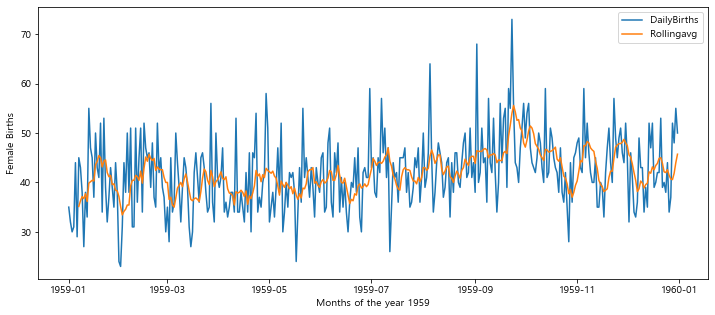

In [289]:
# set figure size
plt.figure(figsize=(12, 5))
  
# plot a simple time series plot
# using seaborn.lineplot()
sns.lineplot(x='Date', y='Births', data=birth_data, label='DailyBirths')

# plot using rolling average
sns.lineplot(x='Date', y='7day_rolling_avg', data=birth_data, label='Rollingavg')
plt.xlabel('Months of the year 1959')
plt.ylabel('Female Births')
plt.show()